# Objects
- Considering a robot that is a 1 meter circle.
- 3 objects: rectangle, triangle, L
- All with obj_radius = 5 m


## Final Objects:

In [ ]:
# Rectangle:
rectangle_desc = {
    'name': 'MultiPolygons',
    'poly_vertices_l': [
        [[2.23606797749979, -4.47213595499958],
         [2.23606797749979, 4.47213595499958],
         [-2.23606797749979, 4.47213595499958],
         [-2.23606797749979, -4.47213595499958]]
    ]
}

triangle_desc = {
    'name': 'MultiPolygons',
    'poly_vertices_l': [
        [[3.75, -2.5],
         [0.0, 5.0],
         [-3.75, -2.5]]
    ]
}

L_desc = {
    'name': 'MultiPolygons',
    'poly_vertices_l': [[[-0.03305392443269466, -2.6112598540991714],
  [-0.03305392443269466, 4.2639559668821585],
  [-2.6112598540991714, 4.2639559668821585],
  [-2.6112598540991714, -2.6112598540991714]],
 [[4.2639559668821585, -2.6112598540991714],
  [4.2639559668821585, -0.03305392443269466],
  [-0.03305392443269466, -0.03305392443269466],
  [-0.03305392443269466, -2.6112598540991714]]]
}

U_desc = {
    'name': 'MultiPolygons',
    'poly_vertices_l': [
        [[-0.2583535923246873, -3.247873787392744],
      [-0.2583535923246873, 3.247873787392744],
      [-2.6942588844721547, 3.247873787392744],
      [-2.6942588844721547, -3.247873787392744]],
     [[3.8014884967249705, -3.247873787392744],
      [3.8014884967249705, -1.623936893696372],
      [-0.2583535923246873, -1.623936893696372],
      [-0.2583535923246873, -3.247873787392744]],
     [[3.8014884967249705, 1.623936893696372],
      [3.8014884967249705, 3.247873787392744],
      [-0.2583535923246873, 3.247873787392744],
      [-0.2583535923246873, 1.623936893696372]]
    ]
}

In [16]:
import sys
sys.path.append('../.')

import numpy as np
import matplotlib.pyplot as plt

from research_envs.b2PushWorld.TransportationPoseWorld import TransportationWorld, TransportationWorldConfig
from research_envs.b2PushWorld.Object import MultiPolygonsObj

In [6]:
world_config= TransportationWorldConfig(
    obstacle_l = [],
    object_l=[
        {'name':'Circle', 'radius':5.0},
    ],
    n_rays = 0,
    agent_type = 'continuous',
    max_force_length=1.0,
    min_force_length=0.0,
    goal_tolerance={'pos':2, 'angle':np.pi/18},
    max_obj_dist=10.0,
)

## 1- Rectangle

2x1 rectangle => normalized such that its radius is 5.

In [12]:
obj_desc = {
    'name': 'MultiPolygons',
    'poly_vertices_l': [
        [[0, 10], [0,0], [5, 0], [5, 10]]
    ]
}
world_config.object_l = [obj_desc]
world = TransportationWorld(world_config)

CoM: b2Vec2(0,0)


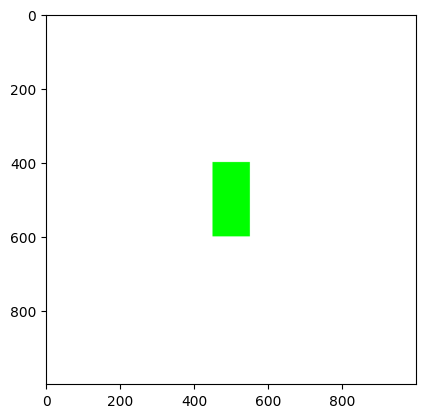

In [22]:
screen =  255 * np.ones(shape=(world.screen_height, world.screen_width, 3), dtype=np.uint8)
world.obj.DrawInPose([25,25], 0, world.pixels_per_meter, screen, (0, 255, 0), 2)
plt.imshow(screen)

In [28]:
s = 5.0 / world.obj.obj_radius
print('Radius: ', world.obj.obj_radius)
print('Scale: ', s)

Radius:  5.5901699437494745
Scale:  0.8944271909999159


In [25]:
body = world.obj.obj_rigid_body
for f_i in range(len(body.fixtures)):
    print(body.fixtures[f_i].shape.vertices)

[(2.5, -5.0), (2.5, 5.0), (-2.5, 5.0), (-2.5, -5.0)]


In [29]:
final_vertices_l = []
body = world.obj.obj_rigid_body
for f_i in range(len(body.fixtures)):
    final_vertices_l.append(
        [[v[0]*s, v[1]*s] for v in body.fixtures[f_i].shape.vertices]
    )

In [30]:
final_vertices_l

[[[2.23606797749979, -4.47213595499958],
  [2.23606797749979, 4.47213595499958],
  [-2.23606797749979, 4.47213595499958],
  [-2.23606797749979, -4.47213595499958]]]

In [31]:
obj_desc = {
    'name': 'MultiPolygons',
    'poly_vertices_l': final_vertices_l
}
world_config.object_l = [obj_desc]
world = TransportationWorld(world_config)
print('Radius: ', world.obj.obj_radius)

CoM: b2Vec2(0,0)
Radius:  5.0


## Triangle


CoM: b2Vec2(0,0)
Radius:  5.333333333333333


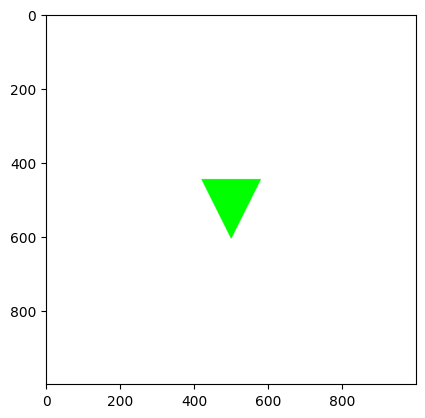

In [34]:
obj_desc = {
    'name': 'MultiPolygons',
    'poly_vertices_l': [
        [[-4, -2], [4, -2], [0, 6]]
    ]
}
world_config.object_l = [obj_desc]
world = TransportationWorld(world_config)
print('Radius: ', world.obj.obj_radius)
screen =  255 * np.ones(shape=(world.screen_height, world.screen_width, 3), dtype=np.uint8)
world.obj.DrawInPose([25,25], 0, world.pixels_per_meter, screen, (0, 255, 0), 2)
plt.imshow(screen)

In [35]:
s = 5.0 / world.obj.obj_radius
print('Radius: ', world.obj.obj_radius)
print('Scale: ', s)

final_vertices_l = []
body = world.obj.obj_rigid_body
for f_i in range(len(body.fixtures)):
    final_vertices_l.append(
        [[v[0]*s, v[1]*s] for v in body.fixtures[f_i].shape.vertices]
    )
final_vertices_l

Radius:  5.333333333333333
Scale:  0.9375


[[[3.75, -2.500000074505806],
  [0.0, 5.000000149011612],
  [-3.75, -2.500000074505806]]]

CoM: b2Vec2(0,0)
Radius:  5.0


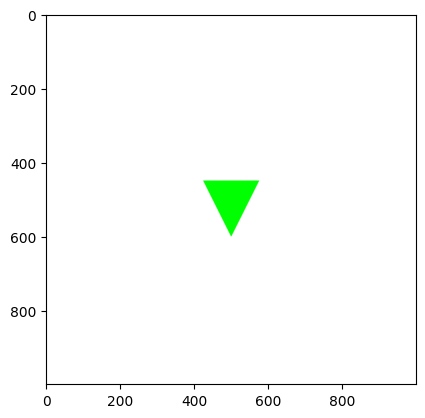

In [38]:
obj_desc = {
    'name': 'MultiPolygons',
    'poly_vertices_l': [
        [[3.75, -2.5],
         [0.0, 5.0],
         [-3.75, -2.5]]
    ]
}
world_config.object_l = [obj_desc]
world = TransportationWorld(world_config)
print('Radius: ', world.obj.obj_radius)
screen =  255 * np.ones(shape=(world.screen_height, world.screen_width, 3), dtype=np.uint8)
world.obj.DrawInPose([25,25], 0, world.pixels_per_meter, screen, (0, 255, 0), 2)
plt.imshow(screen)

## L

CoM: b2Vec2(0,4.89064e-08)
Radius:  5.817999005331258


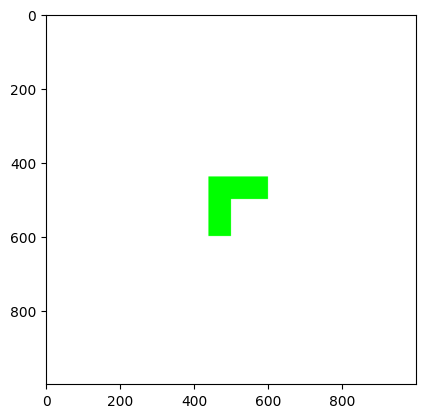

In [39]:
obj_desc = {
    'name': 'MultiPolygons',
    'poly_vertices_l': [
        [[0, 8], [0, 0], [3, 0], [3, 8]],
        [[3, 3], [3, 0], [8, 0], [8, 3]]
    ]
}
world_config.object_l = [obj_desc]
world = TransportationWorld(world_config)
print('Radius: ', world.obj.obj_radius)
screen =  255 * np.ones(shape=(world.screen_height, world.screen_width, 3), dtype=np.uint8)
world.obj.DrawInPose([25,25], 0, world.pixels_per_meter, screen, (0, 255, 0), 2)
plt.imshow(screen)

In [40]:
s = 5.0 / world.obj.obj_radius
print('Radius: ', world.obj.obj_radius)
print('Scale: ', s)

final_vertices_l = []
body = world.obj.obj_rigid_body
for f_i in range(len(body.fixtures)):
    final_vertices_l.append(
        [[v[0]*s, v[1]*s] for v in body.fixtures[f_i].shape.vertices]
    )
final_vertices_l

Radius:  5.817999005331258
Scale:  0.8594020032348418


[[[-0.03305392443269466, -2.6112598540991714],
  [-0.03305392443269466, 4.2639559668821585],
  [-2.6112598540991714, 4.2639559668821585],
  [-2.6112598540991714, -2.6112598540991714]],
 [[4.2639559668821585, -2.6112598540991714],
  [4.2639559668821585, -0.03305392443269466],
  [-0.03305392443269466, -0.03305392443269466],
  [-0.03305392443269466, -2.6112598540991714]]]

CoM: b2Vec2(0,0)
Radius:  4.999999851317127


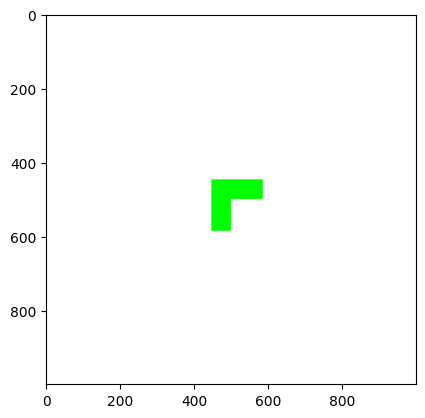

In [41]:
obj_desc = {
    'name': 'MultiPolygons',
    'poly_vertices_l': [[[-0.03305392443269466, -2.6112598540991714],
  [-0.03305392443269466, 4.2639559668821585],
  [-2.6112598540991714, 4.2639559668821585],
  [-2.6112598540991714, -2.6112598540991714]],
 [[4.2639559668821585, -2.6112598540991714],
  [4.2639559668821585, -0.03305392443269466],
  [-0.03305392443269466, -0.03305392443269466],
  [-0.03305392443269466, -2.6112598540991714]]]
}
world_config.object_l = [obj_desc]
world = TransportationWorld(world_config)
print('Radius: ', world.obj.obj_radius)
screen =  255 * np.ones(shape=(world.screen_height, world.screen_width, 3), dtype=np.uint8)
world.obj.DrawInPose([25,25], 0, world.pixels_per_meter, screen, (0, 255, 0), 2)
plt.imshow(screen)

# U

CoM: b2Vec2(0,0)
Radius:  6.157874754134197


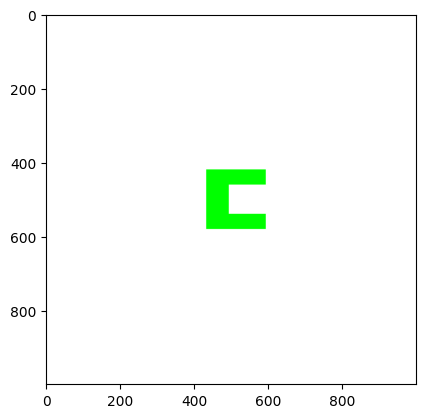

In [43]:
obj_desc = {
    'name': 'MultiPolygons',
    'poly_vertices_l': [
        [[0, 8], [0, 0], [3, 0], [3, 8]],
        [[3, 2], [3, 0], [8, 0], [8, 2]],
        [[3, 8], [3, 6], [8, 6], [8, 8]]
    ]
}
world_config.object_l = [obj_desc]
world = TransportationWorld(world_config)
print('Radius: ', world.obj.obj_radius)
screen =  255 * np.ones(shape=(world.screen_height, world.screen_width, 3), dtype=np.uint8)
world.obj.DrawInPose([25,25], 0, world.pixels_per_meter, screen, (0, 255, 0), 2)
plt.imshow(screen)

In [44]:
s = 5.0 / world.obj.obj_radius
print('Radius: ', world.obj.obj_radius)
print('Scale: ', s)

final_vertices_l = []
body = world.obj.obj_rigid_body
for f_i in range(len(body.fixtures)):
    final_vertices_l.append(
        [[v[0]*s, v[1]*s] for v in body.fixtures[f_i].shape.vertices]
    )
final_vertices_l

Radius:  6.157874754134197
Scale:  0.811968446848186


[[[-0.2583535923246873, -3.247873787392744],
  [-0.2583535923246873, 3.247873787392744],
  [-2.6942588844721547, 3.247873787392744],
  [-2.6942588844721547, -3.247873787392744]],
 [[3.8014884967249705, -3.247873787392744],
  [3.8014884967249705, -1.623936893696372],
  [-0.2583535923246873, -1.623936893696372],
  [-0.2583535923246873, -3.247873787392744]],
 [[3.8014884967249705, 1.623936893696372],
  [3.8014884967249705, 3.247873787392744],
  [-0.2583535923246873, 3.247873787392744],
  [-0.2583535923246873, 1.623936893696372]]]

CoM: b2Vec2(0,-6.57505e-08)
Radius:  4.999999914395622


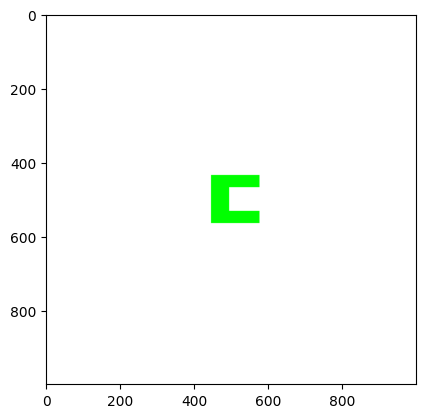

In [45]:
obj_desc = {
    'name': 'MultiPolygons',
    'poly_vertices_l': [[[-0.2583535923246873, -3.247873787392744],
  [-0.2583535923246873, 3.247873787392744],
  [-2.6942588844721547, 3.247873787392744],
  [-2.6942588844721547, -3.247873787392744]],
 [[3.8014884967249705, -3.247873787392744],
  [3.8014884967249705, -1.623936893696372],
  [-0.2583535923246873, -1.623936893696372],
  [-0.2583535923246873, -3.247873787392744]],
 [[3.8014884967249705, 1.623936893696372],
  [3.8014884967249705, 3.247873787392744],
  [-0.2583535923246873, 3.247873787392744],
  [-0.2583535923246873, 1.623936893696372]]]
}
world_config.object_l = [obj_desc]
world = TransportationWorld(world_config)
print('Radius: ', world.obj.obj_radius)
screen =  255 * np.ones(shape=(world.screen_height, world.screen_width, 3), dtype=np.uint8)
world.obj.DrawInPose([25,25], 0, world.pixels_per_meter, screen, (0, 255, 0), 2)
plt.imshow(screen)